<div style="border:2px solid Black; padding:20px;">

#Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самымb высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

</div>

Этапы работы над проектом:

- Изучить данные.
- Провести подготовку данных к моделированию.
- Обучить модель для каждого региона geo_data_0, geo_data_1 и geo_data_2.
- Составить функцию расчета прибыли в регионе.
- Посчитать прибыль и риски за каждый регион и обосновать выбор региона.
- Оформить проект и сделать выводы.


## Загрузка и подготовка данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

from numpy.random import RandomState

RANDOM_STATE = RandomState(12345)

Описание данных:

- id — уникальный идентификатор скважины
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей)
- Загрузим данные из 3-х датасетов

- Признаки для модели:

f0;
f1;
f2.

- Целевой признак:

product.


Загрузим каждый регион в отдельный датафрейм.

In [ ]:
geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')

In [ ]:
geo_data_0.head() , geo_data_0.info(),  geo_data_0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(      id        f0        f1        f2     product
 0  txEyH  0.705745 -0.497823  1.221170  105.280062
 1  2acmU  1.334711 -0.340164  4.365080   73.037750
 2  409Wp  1.022732  0.151990  1.419926   85.265647
 3  iJLyR -0.032172  0.139033  2.978566  168.620776
 4  Xdl7t  1.988431  0.155413  4.751769  154.036647,
 None,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.500419       0.250143       2.502647      92.500000
 std         0.871832       0.504433       3.248248      44.288691
 min        -1.408605      -0.848218     -12.088328       0.000000
 25%        -0.072580      -0.200881       0.287748      56.497507
 50%         0.502360       0.250252       2.515969      91.849972
 75%         1.073581       0.700646       4.715088     128.564089
 max         2.362331       1.343769      16.003790     185.364347)

In [ ]:
geo_data_1.head() , geo_data_1.info(),  geo_data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(      id         f0         f1        f2     product
 0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
 1  62mP7  14.272088  -3.475083  0.999183   26.953261
 2  vyE1P   6.263187  -5.948386  5.001160  134.766305
 3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
 4  AHL4O  12.702195  -8.147433  5.004363  134.766305,
 None,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        1.141296      -4.796579       2.494541      68.825000
 std         8.965932       5.119872       1.703572      45.944423
 min       -31.609576     -26.358598      -0.018144       0.000000
 25%        -6.298551      -8.267985       1.000021      26.953261
 50%         1.153055      -4.813172       2.011479      57.085625
 75%         8.621015      -1.332816       3.999904     107.813044
 max        29.421755      18.734063       5.019721     137.945408)

In [ ]:
geo_data_2.head() , geo_data_2.info(),  geo_data_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(      id        f0        f1        f2     product
 0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
 1  WJtFt  0.262778  0.269839 -2.530187   56.069697
 2  ovLUW  0.194587  0.289035 -5.586433   62.871910
 3  q6cA6  2.236060 -0.553760  0.930038  114.572842
 4  WPMUX -0.515993  1.716266  5.899011  149.600746,
 None,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.002023      -0.002081       2.495128      95.000000
 std         1.732045       1.730417       3.473445      44.749921
 min        -8.760004      -7.084020     -11.970335       0.000000
 25%        -1.162288      -1.174820       0.130359      59.450441
 50%         0.009424      -0.009482       2.484236      94.925613
 75%         1.158535       1.163678       4.858794     130.595027
 max         7.238262       7.844801      16.739402     190.029838)

In [ ]:
def chkdata(data):
    print(f"Shape:    {data.shape}")
    print("Na's:         ", data.isna().sum().sum())
    print("duplicates:   ", data.duplicated().sum())
    print("\nРаспределение признаков:")
    data[["f0","f1","f2"]].hist()
    plt.show()

Shape:    (100000, 5)
Na's:          0
duplicates:    0

Распределение признаков:


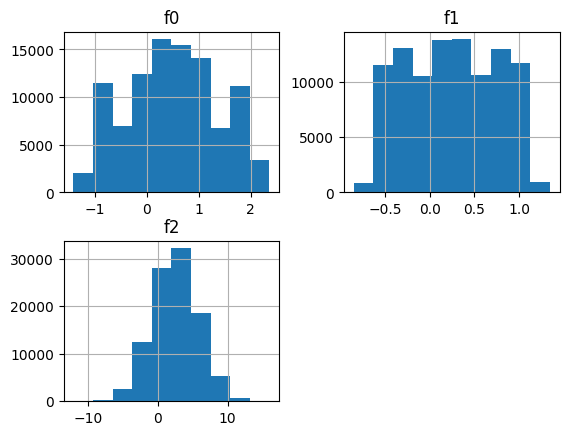

Shape:    (100000, 5)
Na's:          0
duplicates:    0

Распределение признаков:


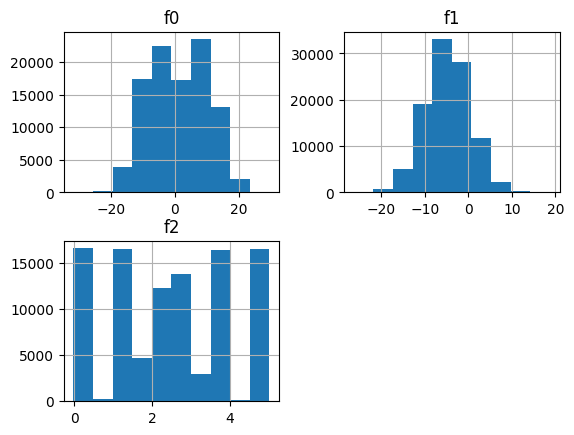

Shape:    (100000, 5)
Na's:          0
duplicates:    0

Распределение признаков:


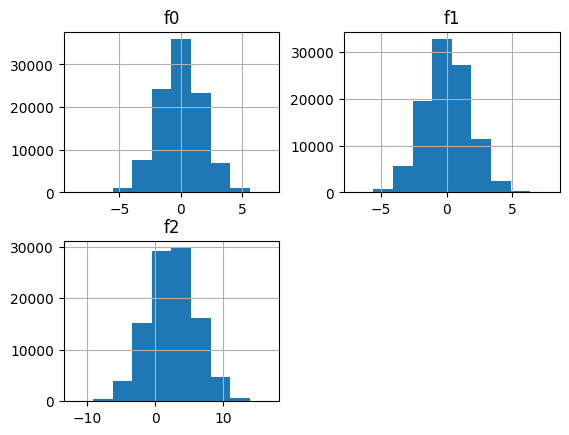

(None, None, None)

In [ ]:
chkdata(geo_data_0) , chkdata(geo_data_1), chkdata(geo_data_2)

В данных отсутствуют пропуски. Удалим из каждого датафрейма столбец id. Он не несет значимости для модели.

In [ ]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [ ]:
def check_zeros(df, target_name):
    zeros = df[df[target_name] == 0][target_name].count()
    percent = (zeros / df.shape[0]) *100
    print('Количество нулевых значений -', zeros)
    print('Процент нулевых значений -', percent)

In [ ]:
check_zeros(geo_data_0, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 0.001


In [ ]:
check_zeros(geo_data_1, 'product')

Количество нулевых значений - 8235
Процент нулевых значений - 8.235000000000001


In [ ]:
check_zeros(geo_data_2, 'product')

Количество нулевых значений - 1
Процент нулевых значений - 0.001


In [ ]:
geo_data_0[geo_data_0['product'] == 0]

,f0,f1,f2,product
57263,-0.702064,0.375992,0.236572,0.0


In [ ]:
geo_data_1[geo_data_1['product'] == 0]

,f0,f1,f2,product
11,16.320755,-0.562946,-0.001783,0.0
13,6.695604,-0.749449,-0.007630,0.0
62,21.418478,-5.134490,-0.002836,0.0
63,6.822701,3.104979,-0.000723,0.0
77,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...
99936,5.085749,-3.980305,0.005063,0.0
99948,8.277805,-9.178818,0.003275,0.0
99956,13.343983,-1.290200,0.005980,0.0
99961,13.854163,-11.528089,-0.005556,0.0


In [ ]:
geo_data_2[geo_data_2['product'] == 0]

,f0,f1,f2,product
68149,-0.865596,-1.615247,-4.126441,0.0


Изучим гистограммы по столбцу product.

In [ ]:
def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[10,5])

    plt.hist(seria, bins=bins)

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

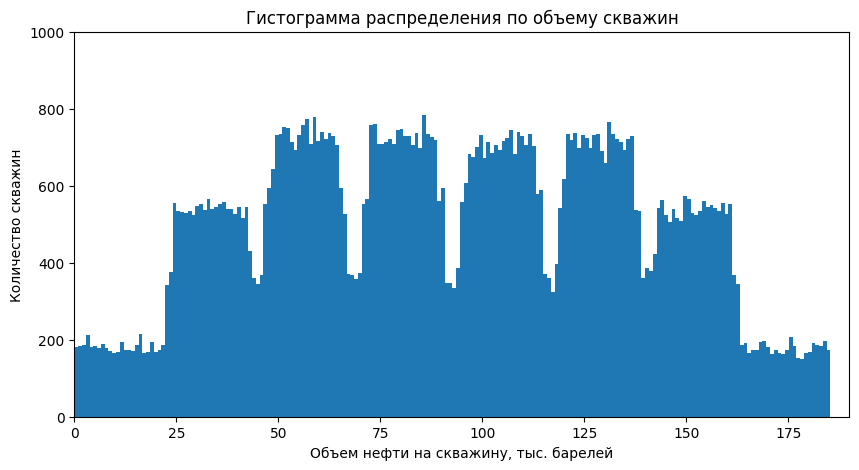

In [ ]:
oil_hist(geo_data_0['product'], 200, 190, 1000)

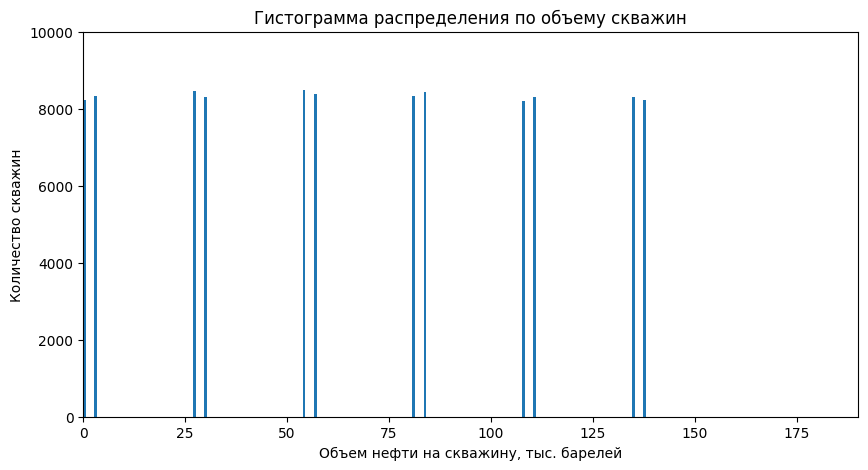

In [ ]:
oil_hist(geo_data_1['product'], 200, 190, 10000)

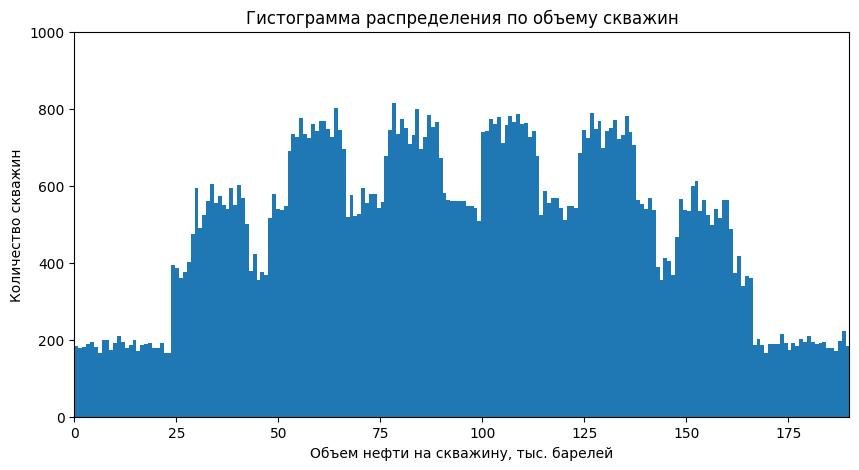

In [ ]:
oil_hist(geo_data_2['product'], 200, 190, 1000)

# Вывод по шагу 1.
Данные готовы к обучению.

Во втором месторождении около 8,2% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего региона можно понять, что были утеряны данные или не было исследовано количество барелей нефти.

По гистограммам можно понять, что у первого и третьего региона наспределение скважин близкое к нормальному. Во втором регионе данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений. Данные не подчиняются закону больших чисел и скорей всего были введены искуственно

## Обучение и проверка модели

Напишем функцию, которая разобъет датасет на обучающую и валидационную выборку

In [ ]:
class PredictionData(object):
    __slots__ = (
        'features_train',
        'target_train',
        'features_valid',
        'target_valid',
    )

    def __init__(
        self, features_train, target_train,
        features_valid, target_valid,
    ):
        self.features_train = features_train
        self.target_train = target_train
        self.features_valid = features_valid
        self.target_valid = target_valid

    def __str__(self):
        return '\n'.join('размер {}: {}'.format(name, data.shape) for name, data in (
            ('features_train', self.features_train),
            ('target_train', self.target_train),
            ('features_valid', self.features_valid),
            ('target_valid', self.target_valid),
        ))

    def __iter__(self):
        return iter((
            self.features_train,
            self.target_train,
            self.features_valid,
            self.target_valid,
        ))

class ProfitAndVolume(object):
    __slots__ = (
        'profit',
        'volume',
    )

    def __init__(self, profit, volume):
        self.profit = profit
        self.volume = volume

    def __str__(self):
        return '\n'.join((
            'Прибыль (млн. руб): {:.2f}'.format((self.profit)/1000000),
            'Суммарный объем сырья (тыс. баррелей): {:.2f}'.format(self.volume/1000),
        ))

    def __iter__(self):
        return iter((self.profit, self.volume))

In [ ]:
def split_df(df):
    # Выделим фичи и целевой показатель product
    features = df.drop(columns=['product'])
    target = df['product']

    # Данные нужно разбить на 2 части: обучающую и валидационную, в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)

    data = PredictionData(
        features_train,
        target_train,
        features_valid,
        target_valid,
    )

    print(data)

    return data

Напишем функцию для обучения модели линейной регрессии и вычисления RMSE для каждого из датасетов.

In [ ]:
from sklearn.metrics.pairwise import normalize
def train_model(df):
    features_train, target_train, features_valid, target_valid = split_df(df)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = pd.Series(model.predict(features_valid), index=features_valid.index)

    print('RMSE: {:.2f}'.format(mean_squared_error(target_valid, predictions_valid) ** 0.5))
    print('Средний запас предсказанного сырья в регионе: {:.2f}'.format(predictions_valid.mean()))

    return target_valid, predictions_valid

Обучим модель на каждом из датасетов и сохраним предсказания и правильные ответы

In [ ]:
target_valid_0, predictions_valid_0 = train_model(geo_data_0)

размер features_train: (75000, 3)
размер target_train: (75000,)
размер features_valid: (25000, 3)
размер target_valid: (25000,)
RMSE: 37.62
Средний запас предсказанного сырья в регионе: 92.44


In [ ]:
target_valid_1, predictions_valid_1 = train_model(geo_data_1)

размер features_train: (75000, 3)
размер target_train: (75000,)
размер features_valid: (25000, 3)
размер target_valid: (25000,)
RMSE: 0.89
Средний запас предсказанного сырья в регионе: 68.97


In [ ]:
target_valid_2, predictions_valid_2 = train_model(geo_data_2)

размер features_train: (75000, 3)
размер target_train: (75000,)
размер features_valid: (25000, 3)
размер target_valid: (25000,)
RMSE: 40.26
Средний запас предсказанного сырья в регионе: 94.83


Выводы:

- исходя из значений RMSE погрешность модели меньше всего для 2 региона
- среднее количество сырья примерно равно в 1 и 3 регионе (92.5 и 95.24 соотвественно), и больше в 1.4 раза, чем во 2


Возможно утеряные данные из второго региона сказались на модели и она достаточно сильно переобучилась.

Но из-за утери данных и малого запаса в среднем на меторождение не имеет смысла рассматривать второе месторождение как прибыльное.

Изучим все регионы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 регионом.

## Подготовка к расчёту прибыли

Сохраним все ключевые значения для расчетов в переменные

In [ ]:
# количество исследуемых точек при разведке
RESEARCH_POINTS = 500

# количество лучших исследуемых точек
BEST_RESEARCH_POINTS = 200

# бюджет на разработку скважин в регионе
BUDGET = 10 * 1e9

# цена за 1000 баррелей сырья
PRODUCT_PRICE = 1000 * 450

# максимальная вероятность убытков
MAX_LOSS = 0.025

# количество выборок для bootstrap
BOOTSTRAP_SAMPLES = 1000

# доверительный интервал
CONF_INTERVAL = 0.95

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины, перед этим надо рассчитать бюджет на разработку одной скважины.

In [ ]:
budget_per_point = BUDGET / BEST_RESEARCH_POINTS
min_product = budget_per_point / PRODUCT_PRICE
print('Минимальный объём сырья для безубыточной разработки новой скважины: {:.2f}'.format(min_product))

Минимальный объём сырья для безубыточной разработки новой скважины: 111.11


Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [ ]:
def calculate_profit(target_valid, predictions_valid):
    research_points = predictions_valid.sample(RESEARCH_POINTS, replace=True, random_state=RANDOM_STATE)
    best_research_points = research_points.sort_values(ascending = False)[:BEST_RESEARCH_POINTS]

    product_volume = target_valid[best_research_points.index].sum()

    profit = PRODUCT_PRICE * product_volume - BUDGET

    return ProfitAndVolume(profit, product_volume)

Выполним ее для каждого из 3-х регионов

In [ ]:
print(calculate_profit(target_valid_0, predictions_valid_0))

Прибыль (млн. руб): 730.40
Суммарный объем сырья (тыс. баррелей): 23.85


In [ ]:
print(calculate_profit(target_valid_1, predictions_valid_1))

Прибыль (млн. руб): 297.18
Суммарный объем сырья (тыс. баррелей): 22.88


In [ ]:
print(calculate_profit(target_valid_2, predictions_valid_2))

Прибыль (млн. руб): 288.69
Суммарный объем сырья (тыс. баррелей): 22.86


**Выводы:**

- Получили, что минимальный объем сырья для безубыточной разработки новой скважины - 111.11 тыс. бареллей.
- Во всех 3-х регионах среднее предсказанное количество сырья меньше, следовательно не все скважины будут безубыточными.
- Взяли 500 точек из предсказаний, из которых отобрали 200 лучших и получили для них суммарный объем сырья, а из него вычислили прибыль.

## Расчёт прибыли и рисков

Применим технику Bootstrap, чтобы найти распределение прибыли.

In [ ]:
def calculate_profit_bootstrap(target_valid, predictions_valid):
    values = []

    for i in range(BOOTSTRAP_SAMPLES):
        profit_and_volume = calculate_profit(target_valid, predictions_valid)
        values.append(profit_and_volume.profit)

    values = pd.Series(values)
    profit_mean = values.mean()

    conf_lower = values.quantile((1 - CONF_INTERVAL) / 2)
    conf_upper = values.quantile((1 + CONF_INTERVAL) / 2)

    loss_probability = (values < 0).sum() / BOOTSTRAP_SAMPLES

    print('Средняя прибыль (млн. руб): {:.2f}'.format((profit_mean)/1000000))
    print('95% доверительный интервал (млн. руб): ({:.2f}, {:.2f})'.format((conf_lower)/1000000, (conf_upper)/1000000))

    if loss_probability < MAX_LOSS:
        print('Вероятность убытков равна {}, что меньше чем максимальная допустимая вероятность {}'.format(loss_probability, MAX_LOSS))
    else:
        print('Вероятность убытков равна {}, что больше чем максимальная допустимая вероятность {}'.format(loss_probability, MAX_LOSS))

    return profit_mean, conf_lower, conf_upper, loss_probability

In [ ]:
profit_and_risks = []

In [ ]:
profit_and_risks.append(calculate_profit_bootstrap(target_valid_0, predictions_valid_0))

Средняя прибыль (млн. руб): 446.99
95% доверительный интервал (млн. руб): (-56.41, 939.11)
Вероятность убытков равна 0.043, что больше чем максимальная допустимая вероятность 0.025


In [ ]:
profit_and_risks.append(calculate_profit_bootstrap(target_valid_1, predictions_valid_1))

Средняя прибыль (млн. руб): 461.30
95% доверительный интервал (млн. руб): (61.72, 862.95)
Вероятность убытков равна 0.013, что меньше чем максимальная допустимая вероятность 0.025


In [ ]:

profit_and_risks.append(calculate_profit_bootstrap(target_valid_2, predictions_valid_2))

Средняя прибыль (млн. руб): 345.91
95% доверительный интервал (млн. руб): (-168.44, 848.57)
Вероятность убытков равна 0.099, что больше чем максимальная допустимая вероятность 0.025


In [ ]:
profit_and_risks_df = pd.DataFrame(profit_and_risks, columns = ['profit_mean', 'conf_lower', 'conf_upper', 'loss_probability'])
profit_and_risks_df.head(3)

,profit_mean,conf_lower,conf_upper,loss_probability
0,4.469891e+08,-5.641287e+07,9.391103e+08,0.043
1,4.612971e+08,6.172024e+07,8.629536e+08,0.013
2,3.459087e+08,-1.684392e+08,8.485704e+08,0.099


<div style="border:2px solid Black; padding:20px;">

# Выводы:

- Из таблицы видно, что единственный регион, где вероятность убытков ниже, чем допустимое значение - второй (первый, если использовать индексацию с 0), поэтому для разработки скважин надо выбрать его.
- Также у второго региона самый узкий доверительный интервал и самая выскокая средняя прибыль.

</div>
